No errors found for circuit: 'My first RC network' from file: 'myFirstRCnetwork.cir'.



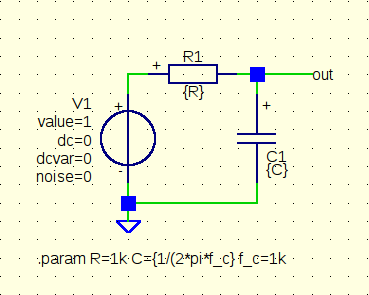

In [1]:
from SLiCAPnotebook import *
# Always run SLiCAP from the project directory, this will define the correct path settings.
t1=time()

prj = initProject('My first RC network') # Sets all the paths and creates the HTML main index page.

fileName = 'myFirstRCnetwork.cir'
i1 = instruction()                       # Creates an instance of an instruction object
i1.setCircuit(fileName)                # Checks and defines the local circuit object and
                                         # sets the index page to the circuit index page
# We will generate a HTML report (not from within Jupyter). Let us first create an empty HTML page:
htmlPage('Circuit data')
# Put a header on this page and display the circuit diagram on it.
head2html('Circuit diagram')
img2html('myFirstRCnetwork.svg', 250, caption = 'Circuit diagram of the RC network.', label = 'figRCnetwork')
# You can display SVG type images in this notebook, but they cannot be scaled. Her with simpy display the 
# .png type image.
Image('img/myFirstRCnetwork_asc.png')

In [2]:
HTML(netlist2html(fileName, label = 'netlist')) # This displays the netlist

In [3]:
HTML(elementData2html(i1.circuit, label = 'elementData')) # This shows the data of the expanded netlist

RefDes,Nodes,Refs,Model,Param,Symbolic,Numeric
C1,out 0,,C,value,$$C$$,$$1.592 \cdot 10^{-7}$$
R1,N001 out,,R,value,$$R$$,$$1000.0$$
V1,N001 0,,V,value,$$1$$,$$1$$
,,,,dc,$$0$$,$$0$$
,,,,dcvar,$$0$$,$$0$$
,,,,noise,$$0$$,$$0$$


In [4]:
HTML(params2html(i1.circuit, label = 'params')) # This displays the circuit parameters

Name,Symbolic,Numeric
$$C$$,$$\frac{1}{2 \pi R f_{c}}$$,$$1.592 \cdot 10^{-7}$$
$$R$$,$$1000.0$$,$$1000.0$$
$$f_{c}$$,$$1000.0$$,$$1000.0$$


In [5]:
# Let us define an instruction to display the symbolic MNA matrix equation.
# This is done by defining attributes of the instruction object 'i1'
i1.setSimType('symbolic');
i1.setGainType('vi');
i1.setDataType('matrix');

In [6]:
# We execute the instruction and assign the result to a variable 'MNA'
MNA = i1.execute();

In [7]:
# We will put the instruction on a new HTML page and display it in this notebook
htmlPage('Matrix equations')
# Let us put some explaining text in the report:
text2html('The MNA matrix equation for the RC network is:')
HTML(matrices2html(MNA, label = 'MNA', labelText = 'MNA equation of the network'))

In [8]:
# The variables in this equation are available in the variable that holds 
# the result of the execution:
#
# 1. The vector 'Iv' with independent variables:
text2html('The vector with independent variables is:')
HTML(eqn2html('I_v', MNA.Iv, label = 'Iv', labelText = 'Vector with independent variables'))

In [9]:
# 2. The matrix 'M':
text2html('The MNA matrix is:')
HTML(eqn2html('M', MNA.M, label = 'M', labelText = 'MNA matrix'))

In [10]:
# 3. The vercor wit dependent variables 'Dv':
text2html('The vector with dependent variables is:')
HTML(eqn2html('D_v', MNA.Dv, label = 'Dv', labelText = 'Vector with dependent variables'))

In [11]:
# Let us now evaluate the transfer function of this network.
# To this end we need to define a signal source and a detector.
# Both the source and the detector are attributes of the instruction object:
i1.setSource('V1')    # 'V1' is the identifier of the independent source that we assign as signal source
i1.setDetector('V_out') # 'V_out' is the voltage at node 'out' with respect to ground (node '0')
# The transfer from source to load is called 'gain'. Later we will discuss more transfer types.
i1.setGainType('gain')
# The data that we would like to obtain is the Laplace transfer of the gain. SLiCAP has many different 
# data types. The data type for an instruction is also an attribute of the instruction object:
i1.setDataType('laplace')
# SLiCAP performs symbolic calculations, even when the data is numeric. In those case SLiCAP calculates
# with rationals. Only in a limited number of cases SLiCAP calculates with floats.
# Numeric values or combined numeric/symbolic expressions can be assigned to circuit parameters. In cases
# in which the simulation type is set to 'numeric' such definitions are substituted recursively.
#
# Let us display the transfer symbolically. In this case we have no parameters defined, so 'numeric' will
# give the same answer as 'symbolic'.
i1.setSimType('symbolic')
# Let us execute the (modified) instruction 'i1' and assign the result to the variable gain:
gain = i1.execute()
# The laplace transform can now be found in the attribute 'laplace' of 'gain'.
HTML(eqn2html('V_out/V_1', gain.laplace, label = 'gainLaplace', labelText = 'Laplace transfer function'))

In [12]:
# The parameters 'R' and 'C' stem from the circuit, while 's' is defined as the Laplace variable:
print(ini.Laplace)

s


In [13]:
# SLiCAP has a lot of predefined plots. The results of an analysis with data type 'laplace' can
# graphically be represented with:
# 1. magnitude plots versus frequency
# 2. dB magnitude plots versus frequency
# 3. phase plots versus frequency
# 4. (group) delay plots versus frequency
# For plotting we need numeric values:
i1.setSimType('numeric') 
numGain = i1.execute() 
# We will create a new HTML page for the plots
htmlPage('Plots')

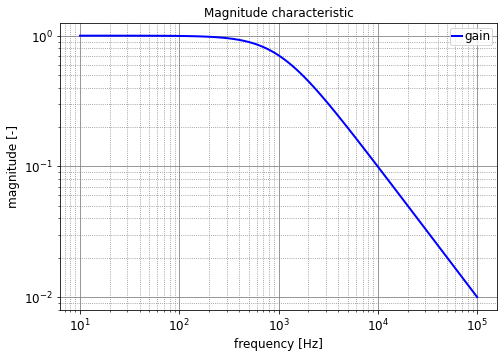

In [14]:
head2html('Frequency domain plots')
figMag = plotSweep('RCmag', 'Magnitude characteristic', numGain, 10, '100k', 100, yUnits = '-', show = True)

In [15]:
# This will put the figure on the HTML page with a width of 800 pixels, a caption and a label:
fig2html(figMag, 600, caption = 'Magnitude characteristic of the RC network.', label = 'figMag');

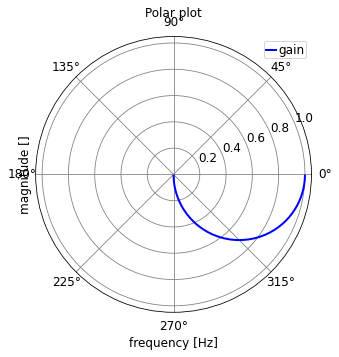

'Z:\\SLiCAP\\SLiCAP_github\\SLiCAP_python3\\examples\\myFirstRCnetwork/html/img/RCpolar.svg'

In [16]:
figPol = plotSweep('RCpolar', 'Polar plot', numGain, 10, '100k', 100, axisType = 'polar', show = True)
fig2html(figPol, 600, caption = 'Polar plot of the transfer of the RC network.', label = 'figPolar')

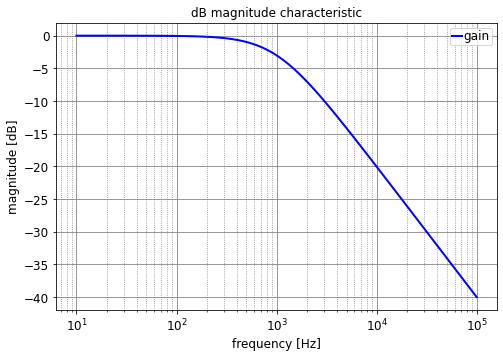

In [17]:
figdBmag = plotSweep('RCdBmag', 'dB magnitude characteristic', numGain, 10, '100k', 100, funcType = 'dBmag', show = True)

In [18]:
fig2html(figdBmag, 600, caption = 'dB Magnitude characteristic of the RC network.', label = 'figdBmag');

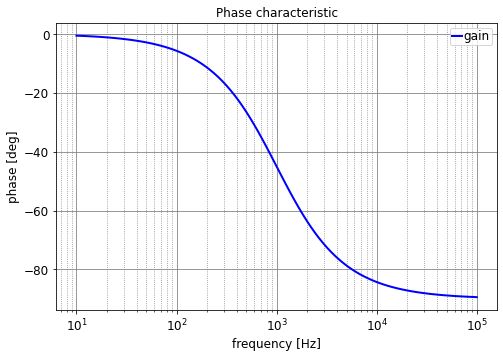

In [19]:
figPhase = plotSweep('RCphase', 'Phase characteristic', numGain, 10, '100k', 100, funcType = 'phase', show = True)

In [20]:
fig2html(figPhase, 600, caption = 'Phase characteristic of the RC network.', label = 'figPhase');

In [21]:
# We will display the delay in 'us'
figDelay = plotSweep('RCdelay', 'Group delay characteristic', numGain, 10, '100k', 100, yScale = 'u', funcType = 'delay')

In [22]:
fig2html(figDelay, 600, caption = 'Group delay characteristic of the RC network.', label = 'figDelay');

In [23]:
# With data type: 'pz' we can calculate the DC value of the gain and the poles and the zeros.
# This data type requires numeric component values.
i1.setDataType('pz')
pzGain = i1.execute()

In [24]:
# We will create a new HTML page for displaying the results and display them also in this notebook.
htmlPage('Poles and zeros')
HTML(pz2html(pzGain, label = 'PZlist', labelText = 'Poles and zeros of the network'))

pole,Re [Hz],Im [Hz],Mag [Hz],Q
p1,-1000.,,1000.,
zero,Re [Hz],Im [Hz],Mag [Hz],Q


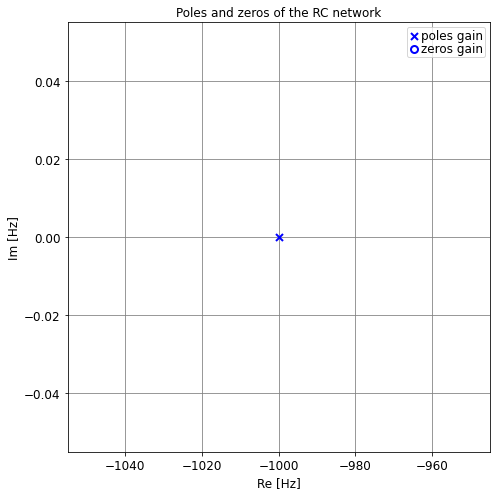

In [25]:
# Let us also add a pole-zero plot of these results:
head2html("Complex frequency domain plots")
figPZ = plotPZ('PZ', 'Poles and zeros of the RC network', pzGain, show = True)

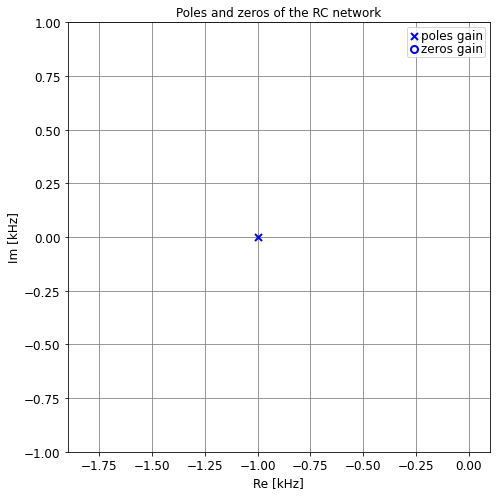

In [26]:
# You can also set the range and the units of the axes of this plot:
# We will redefine the figure object 'figPZ'
figPZ = plotPZ('PZ', 'Poles and zeros of the RC network', pzGain, xmin = -1.9, xmax = 0.1, ymin = -1, ymax = 1, xscale = 'k', yscale = 'k', show = True)
fig2html(figPZ, 600, caption = 'Poles and zeros of the RC network.', label = 'figPZ');

In [27]:
# The data types 'poles' and 'zeros' can be used to calculate the poles and the zeros separately. 
# The difference with data type 'pz' is that the latter one cancels poles and zeros that coincide
# withing the display accuracy (ini.disp) and calculated the zero-frequency value of the transfer.
# Displaying the result of all three data types gives you the DC gain and the non observable poles.

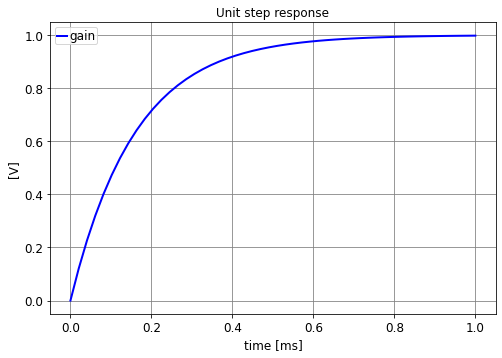

In [28]:
# With data types 'impulse' and 'step' you can calculate the impulse response and the step response
# of the network, respctively. These responses are obtained from the inverse Laplace transform of
# the transfer function (impulse response) or the transfer function multiplied with 1/ini.Laplace.
i1.setDataType('step')
numStep = i1.execute()
figStep = plotSweep('step', 'Unit step response', numStep, 0, 1, 50, sweepScale='m', show = True)

In [29]:
# Let us put this plot on the page with the plots. You can get a list with page names by typing: 'ini.htmlPages'
ini.htmlPage = 'My-first-RC-network_Plots.html'
head2html('Time domain plots')
fig2html(figStep, 600, caption = 'Unit step response of the RC network.', label = 'figStep');

In [30]:
# SLiCAP is developed for setting up and solving circuit design equations
# In the following section we will write the values of the circuit
# components as a function of the setting time to n bit.
# The procedure is as follows:
# 1. Get a symbolic expression of the output voltage as a function of time
# 2. Get a symbolic expression for the settling error delta_t as function of time
# 3. Find the settling tau_s by solving: delta_t = 2^(-n)
# 4. Find the design equations for  the component values:
#    a. Write the resistance 'R_R1' as a function of 'n', 'tau_s' and 'C'
#    b. Write the capacitance 'C_R1' as a function of 'n', 'tau_s' and 'R'
#
# Let us first create a new page for the above:
htmlPage('Design equations for $R$ and $C$', label = 'desEq')
head2html('The unit step response')
# Step 1:
i1.setSimType('symbolic')
i1.setDataType('step')
symStep = i1.execute()
a_t     = sp.Symbol('a_t')
HTML(eqn2html(a_t, symStep.stepResp, label = 'a_t', labelText = 'Symbolic expression of the unit step response'))

In [31]:
# Step 2:
head2html("The settling error versus time")
t             = sp.Symbol('t', positive = True)
# Redefine all symbols in the expression as positive
stepResp = assumePosParams(symStep.stepResp)
settlingError = sp.limit(stepResp, t, 'oo') - stepResp
epsilon_t     = sp.Symbol('epsilon_t')
HTML(eqn2html(epsilon_t, settlingError, label = 'epsilon_t', labelText = 'Symbolic expression of the settling error versus time'))

In [32]:
# Step 3:
head2html("The n-bit settling time")
n            = sp.Symbol('n', positive = True)
settlingTime = sp.solve(settlingError - 2**(-n), t)[0] # In this case there is only one solution
tau_s        = sp.Symbol('tau_s', positive = True)
HTML(eqn2html(tau_s, settlingTime, label = 'tau_s', labelText = 'Symbolic expression of the settling time'))

In [33]:
# Step 4a:
head2html("The design equation for $R$")
R   = sp.Symbol('R', positive = True)
RR1 = sp.solve(settlingTime - tau_s, R)[0] # In this case there is only one solution
HTML(eqn2html(R, RR1, label = 'RR1', labelText = 'Design equation for $R$'))

In [34]:
# Step 4b:
head2html("The design equation for $C$")
C   = sp.Symbol('C', positive = True)
CC1 = sp.solve(settlingTime - tau_s, C)[0] # In this case there is only one solution
HTML(eqn2html(C, CC1, label = 'CC1', labelText = 'Design equation for $C$'))

In [35]:
head2html("Numeric example.")
text2html("We will determine R for the case in which we need 10 bit settling within 100ns with a capacitance C=10pF. We obtain:")
Rvalue = sp.N(RR1.subs([(tau_s, 100e-9), (n, 10), (C, 1e-11)]))
HTML(eqn2html(R, Rvalue, label = 'Rvalue', labelText = 'Numeric value of $R$'))

In [36]:
# This will create an HTML page with links to all labeled items.
links2html();

In [37]:
t2 = time()
print("Total time: %3.1fs"%(t2-t1))

Total time: 11.1s
